<a href="https://colab.research.google.com/github/JishnuSethuraman/Machine-Learning/blob/main/MNIST_ANN_vs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [ ]:
#generating data
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
#scaling & creaing a validation set
X_train, X_valid = X_train_full[:50000]/255.0, X_train_full[50000:]/255.0
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [ ]:
X_train.shape

(50000, 28, 28)

In [ ]:
#building the ANN
ann_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation='softmax',)
])
#seeing a summar of the model
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Plotting the model
keras.utils.plot_model(ann_model, show_shapes=True)

In [ ]:
#model training
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics='accuracy')
history = ann_model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid),batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 6s 3ms/step - loss: 0.0470 - accuracy: 0.9859 - val_loss: 0.0725 - val_accuracy: 0.9795
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0443 - accuracy: 0.9868 - val_loss: 0.0709 - val_accuracy: 0.9799
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0430 - accuracy: 0.9875 - val_loss: 0.0720 - val_accuracy: 0.9789
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0411 - accuracy: 0.9880 - val_loss: 0.0701 - val_accuracy: 0.9805
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0402 - accuracy: 0.9883 - val_loss: 0.0685 - val_accuracy: 0.9800
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0393 - accuracy: 0.9888 - val_loss: 0.0686 - val_accuracy: 0.9804
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0369 - accuracy: 0.9891 - val_loss: 0.0707 - val_accuracy:

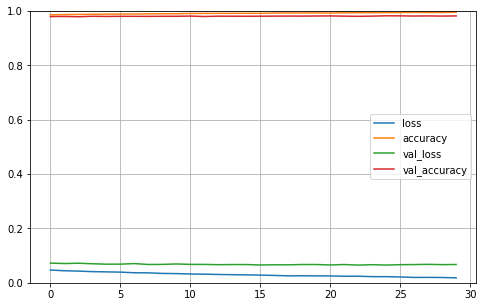

In [ ]:
#plotting the learning curves
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
#creating the CNN
cnn_model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation = 'softmax'),
    ]
)

In [ ]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [ ]:
#model training
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics='accuracy')
history = cnn_model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid),batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 11s 4ms/step - loss: 0.7598 - accuracy: 0.7616 - val_loss: 0.1959 - val_accuracy: 0.9490
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2354 - accuracy: 0.9285 - val_loss: 0.1343 - val_accuracy: 0.9629
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1805 - accuracy: 0.9447 - val_loss: 0.1113 - val_accuracy: 0.9687
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1528 - accuracy: 0.9541 - val_loss: 0.0970 - val_accuracy: 0.9737
Epoch 5/30
1563/1563 [==============================] - 5s 4ms/step - loss: 0.1344 - accuracy: 0.9585 - val_loss: 0.0868 - val_accuracy: 0.9754
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1230 - accuracy: 0.9624 - val_loss: 0.0867 - val_accuracy: 0.9759
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1133 - accuracy: 0.9660 - val_loss: 0.0754 - val_accuracy

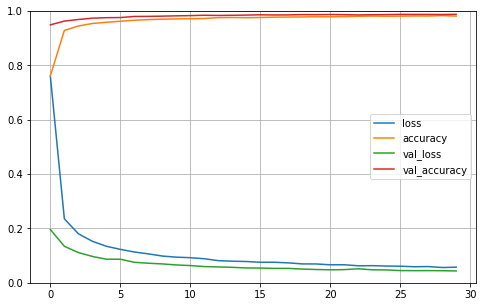

In [ ]:
#plotting the learning curves
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
ann_model.evaluate(X_test/255.0,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0625 - accuracy: 0.9797


[0.06249982863664627, 0.9797000288963318]

In [ ]:
cnn_model.evaluate(X_test/255.0,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0355 - accuracy: 0.9885


[0.03554243594408035, 0.9884999990463257]